# Travel Order Resolver (A* Algorithm)

## Vocabulary
- **Node**: A location on the map
- **Edge**: A path between two nodes
- **Weight**: The distance between two nodes
- **Graph**: A collection of nodes and edges

## How A* Algorithm Works
A* is a heuristic search algorithm employed in graph traversal and pathfinding. It efficiently determines the **shortest route** from an **initial node to a destination node** by assessing nodes based on both the **actual cost** to reach them from the starting point g(n) and a **heuristic estimate** of the remaining cost to reach the destination from those nodes h(n).

The algorithm maintains an open set of nodes for exploration, commencing with the initial node. It calculates the total cost **f(n) = g(n) + h(n)** for each node and prioritizes nodes with lower **f(n)** values.

A* effectively balances exploration by considering the current path's cost and **estimating** the potential remaining cost to reach the destination. This equilibrium enables A* to find optimal paths while exploring only a fraction of the entire search space. Upon reaching the destination, the algorithm reconstructs the shortest path by tracing back from the destination node to the starting node using recorded parent pointers.

### Computation of Heuristic Function
The chosen heuristic computes the **straight-line distance** (Euclidean distance) between the **current node** and the **destination node**, assuming a two-dimensional plane. This heuristic guides the search towards the destination, enhancing the algorithm's efficiency by exploring nodes **likely** to lead to a shorter path. Importantly, the heuristic is admissible, ensuring it **never overestimates** the actual cost to reach the destination, thereby upholding the correctness of the A* algorithm.

## Computational Complexity
In algorithmic analysis, *O(V)* denotes "order of V," indicating that as the number of elements (V) increases, the algorithm's resource usage (time or space) also increases linearly with V. This notation signifies how an algorithm's performance scales concerning the problem size. Efficient and inefficient complexities are categorized as follows:
- **Favorable Complexity**: Lower order complexities, like *O(1)* (constant time), signify excellent performance since the algorithm's efficiency remains constant regardless of the input size. *O(log n)* and *O(n)* are also favorable for practical purposes, representing efficient algorithms.
- **Intermediate Complexity**: *O(n log n)* is generally acceptable and efficient for various real-world scenarios, often seen in sorting algorithms like mergesort and quicksort.
- **Unfavorable Complexity**: Higher order complexities such as *O(n^2)*, *O(2^n)*, or *O(n!)* are unfavorable, indicating rapid performance degradation as the input size increases, rendering them impractical for large datasets.

In [1]:
# Packages to import
import networkx as nx
from module.FranceGraphBuilder import FranceGraphBuilder
from module.GraphAlgorithms import GraphAlgorithms

%load_ext line_profiler
%load_ext memory_profiler

In [2]:
graph_builder = FranceGraphBuilder()
graph = graph_builder.create_graph()

graph_algorithms = GraphAlgorithms(graph)

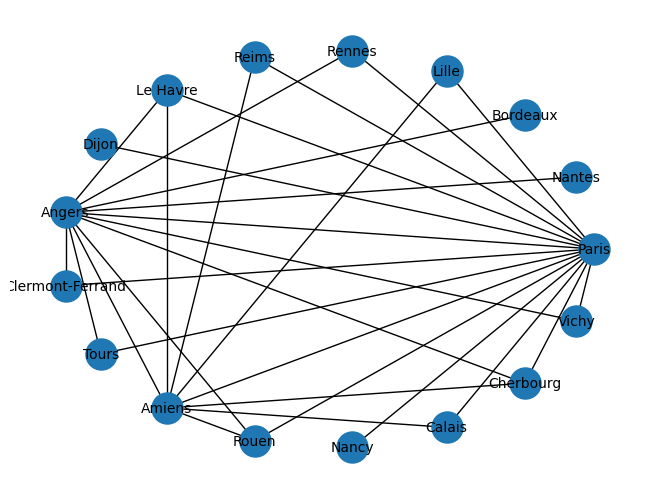

In [3]:
graph_algorithms.draw_graph()

Shortest path: ['Tours', 'Paris', 'Lille']
Shortest path: ['Tours', 'Paris', 'Lille']


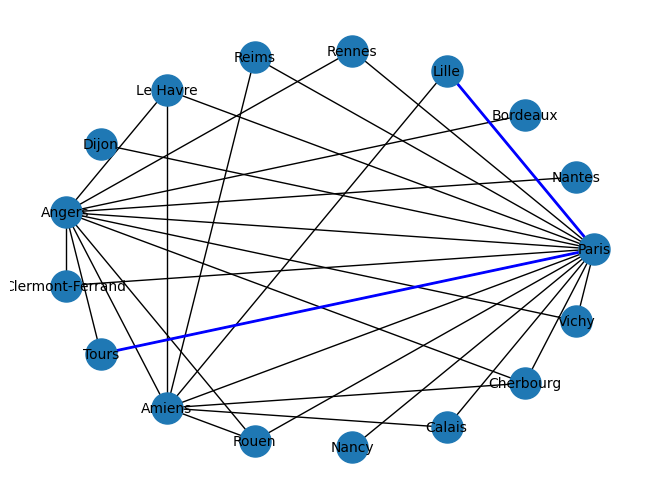

In [4]:
path = graph_algorithms.astar_search('Tours', 'Lille')
print("Shortest path:", path)
graph_algorithms.draw_path(path)

path = nx.shortest_path(graph, 'Tours', 'Lille', weight='weight')
print("Shortest path:", path)

In [5]:
# Execution time
%timeit -r 2 -n 5 graph_algorithms.astar_search('Tours', 'Lille')
%timeit -r 2 -n 5 nx.shortest_path(graph, 'Tours', 'Lille', weight='weight')

41.8 µs ± 4.84 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)
23.4 µs ± 3.84 µs per loop (mean ± std. dev. of 2 runs, 5 loops each)


In [6]:
# Execution profiler
%prun -s cumulative graph_algorithms.astar_search('Tours', 'Lille')

         375 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 GraphAlgorithms.py:43(astar_search)
       19    0.000    0.000    0.000    0.000 GraphAlgorithms.py:29(heuristic)
       53    0.000    0.000    0.000    0.000 graph.py:489(__getitem__)
       53    0.000    0.000    0.000    0.000 coreviews.py:80(__getitem__)
       12    0.000    0.000    0.000    0.000 graph.py:1315(neighbors)
       38    0.000    0.000    0.000    0.000 reportviews.py:188(__getitem__)
        1    0.000    0.000    0.000    0.000 GraphAlgorithms.py:59(<dictcomp>)
       53    0.000    0.000    0.000    0.000 coreviews.py:52(__getitem__)
       53    0.000    0.000    0.000    0.000 coreviews.py:43(__init__)
       13    0.000   

In [7]:
%prun -s cumulative nx.shortest_path(graph, 'Tours', 'Lille', weight='weight')

         171 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 backends.py:129(wrapper)
        1    0.000    0.000    0.000    0.000 generic.py:41(shortest_path)
        1    0.000    0.000    0.000    0.000 weighted.py:2254(bidirectional_dijkstra)
       43    0.000    0.000    0.000    0.000 weighted.py:78(<lambda>)
       43    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
       27    0.000    0.000    0.000    0.000 {built-in method _heapq.heappush}
        1    0.000    0.000    0.000    0.000 weighted.py:41(_weight_function)
       27    0.000    0.000    0.000    0.000 {built-in method builtins.next}
        2    0.000    0.000    0.000    0.000 graph.py:453(__contains__)
        9   

In [8]:
# Memory usage
%memit graph_algorithms.astar_search('Tours', 'Lille')
%memit nx.shortest_path(graph, 'Tours', 'Lille', weight='weight')

peak memory: 150.08 MiB, increment: 0.08 MiB
peak memory: 150.08 MiB, increment: 0.00 MiB
